In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import urllib.request

In [2]:
# Load the Titanic dataset and make it classy
# Download data from a website
url = "https://github.com/JohnEric-Creator/FreeDataScienceAcquisition/raw/main/Titanic-Dataset.csv"
filename = "Titanic-Dataset.csv"
urllib.request.urlretrieve(url, filename)

('Titanic-Dataset.csv', <http.client.HTTPMessage at 0x1b406cbe460>)

###### First, let's load the data and do some data cleaning:

In [3]:
titanic = pd.read_csv(filename)

In [4]:
# Drop the 'Cabin' column
titanic.drop('Cabin', axis=1, inplace=True)

# Impute missing values for 'Age'
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

###### Next, let's create some new features:

In [6]:
# Create a feature for family size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Create a binary feature for whether the passenger is traveling alone
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)

# Create a feature for age group
bins = [0, 18, 65, 100]
labels = ['child', 'adult', 'elderly']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels)

In [7]:
# Use correlation analysis to select the most important features
corr = titanic.corr()
corr_survival = corr['Survived'].sort_values(ascending=False)
print(corr_survival)

Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


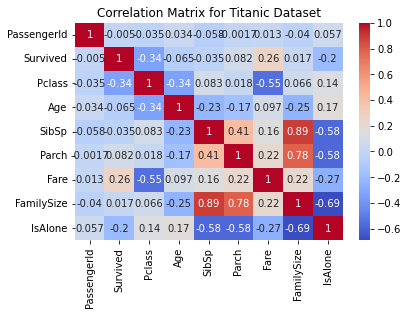

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = titanic.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Titanic Dataset')
plt.show()